In [1]:
import matplotlib.pyplot as plt

In [2]:
def raw_data_processing(file_path):
    doc=[]
    temp={}
    with open(file_path) as f:
        for line in f:
            content=line.rstrip().split('\t')
            if len(content)==1:
                doc.append(temp)
                temp={}
            else:
                if len(content[0].split(' '))==2:
                    if not content[0]+'_0' in temp:
                        temp[content[0]+'_0']=float(content[1])
                    else:
                        if content[0]+'_1' in temp:
                            temp[content[0]+'_2']=float(content[1])
                        else:
                            temp[content[0]+'_1']=float(content[1])
                else:
                    temp[content[0]]=float(content[1])
    return doc

def pickup(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,content):
    for i in content:
        proc_bw_content_0.append(i['real_bw_0'])
        proc_bw_content_1.append(i['real_bw_1'])
        proc_bw_content_2.append(i['real_bw_2'])
        
def smooth(proc_bw_content_0):
    for i in range(len(proc_bw_content_0)):
        if proc_bw_content_0[i] < 0.001:
            proc_bw_content_0[i]=0
        if proc_bw_content_0[i] > 100:
            proc_bw_content_0[i]=proc_bw_content_0[i-1]

def mysum(content_0,content_1,content_2,content_sum):
    for i in range(len(content_0)):
        content_sum.append(content_0[i]+content_1[i]+content_2[i])

In [3]:
file_path="C:\\Users\\ycy\\Desktop\\SS_Abstract_EDPF.dat"
content=raw_data_processing(file_path)

In [4]:
content

[{'Standard_NC_YCY_v1.0': 1208214040.0,
  'set bw_0': 80.0,
  'set loss_0': 0.0001,
  'set delay_0': 10.0,
  'set bw_1': 10.0,
  'set loss_1': 0.0005,
  'set delay_1': 20.0,
  'set bw_2': 70.0,
  'set loss_2': 0.0001,
  'set delay_2': 30.0,
  'real_bw_0': 0.109172,
  'real_loss_0': 0.0,
  'real_delay_0': 10.0,
  'real_tx_packets_0': 244.0,
  'real_rx_packets_0': 244.0,
  'real_bw_1': 0.10406,
  'real_loss_1': 0.0,
  'real_delay_1': 21.0,
  'real_tx_packets_1': 238.0,
  'real_rx_packets_1': 238.0,
  'real_bw_2': 0.111489,
  'real_loss_2': 0.0,
  'real_delay_2': 30.0,
  'real_tx_packets_2': 255.0,
  'real_rx_packets_2': 255.0},
 {'Standard_NC_YCY_v1.0': 1208214045.0,
  'set bw_0': 70.0,
  'set loss_0': 0.005,
  'set delay_0': 40.0,
  'set bw_1': 90.0,
  'set loss_1': 0.005,
  'set delay_1': 15.0,
  'set bw_2': 1.0,
  'set loss_2': 0.0001,
  'set delay_2': 40.0,
  'real_bw_0': 0.0744157,
  'real_loss_0': 0.0,
  'real_delay_0': 40.0,
  'real_tx_packets_0': 163.0,
  'real_rx_packets_0': 162

In [5]:
proc_bw_content_0=[]
proc_bw_content_1=[]
proc_bw_content_2=[]
proc_bw_content_sum=[]

In [6]:
pickup(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,content)
smooth(proc_bw_content_0)
smooth(proc_bw_content_1)
smooth(proc_bw_content_2)
mysum(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,proc_bw_content_sum)

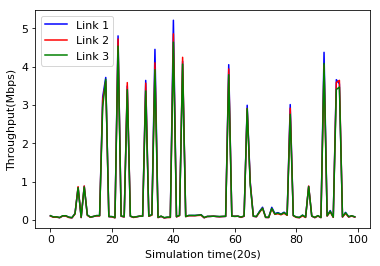

In [7]:
plt.plot(proc_bw_content_0,'b',label="Link 1")
plt.plot(proc_bw_content_1,'r',label="Link 2",)
plt.plot(proc_bw_content_2,'g',label="Link 3")
#plt.plot(proc_bw_content_sum,linestyle='-',color='mediumvioletred',label="Total",linewidth=2)
plt.xlabel("Simulation time(20s)",fontsize=11)
plt.ylabel("Throughput(Mbps)",fontsize=11)
plt.legend(fontsize=11)
#plt.legend(bbox_to_anchor=(1.05,0.75),loc=3,borderaxespad=0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [9]:
proc_bw_content_sum

[0.32472100000000004,
 0.2240277,
 0.23051460000000001,
 0.1833769,
 0.319249,
 0.319495,
 0.2074868,
 0.1719888,
 0.489487,
 2.557748,
 0.1990921,
 2.627921,
 0.380146,
 0.2157133,
 0.2748558,
 0.332483,
 0.333882,
 9.29243,
 11.009319999999999,
 0.26743100000000003,
 0.2548398,
 0.1772753,
 14.068379999999998,
 0.3014551,
 0.246517,
 10.4856,
 0.2971782,
 0.2073234,
 0.250219,
 0.29519819999999997,
 0.2921179,
 10.5813,
 0.2986753,
 0.399995,
 12.478729999999999,
 0.19506220000000002,
 0.289442,
 0.1698132,
 0.20544460000000003,
 0.20763760000000003,
 14.71265,
 0.249898,
 0.357876,
 12.458089999999999,
 0.2668182,
 0.345934,
 0.34569,
 0.34489400000000003,
 0.365736,
 0.39471100000000003,
 0.18056250000000001,
 0.2735933,
 0.2798039,
 0.2958281,
 0.2735215,
 0.2600397,
 0.27357849999999995,
 0.28331280000000003,
 11.78671,
 0.2943618,
 0.2837413,
 0.2929824,
 0.2146132,
 0.3035737,
 8.81014,
 2.851147,
 0.292939,
 0.2600719,
 0.630968,
 0.9453659999999999,
 0.20381680000000002,
 0.1

In [12]:
def pickup_2(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,content):
    for i in content:
        proc_bw_content_0.append(i['real_loss_0'])
        proc_bw_content_1.append(i['real_loss_1'])
        proc_bw_content_2.append(i['real_loss_2'])

In [14]:
pickup_2(proc_loss_content_0,proc_loss_content_1,proc_loss_content_2,content)

In [18]:
proc_delay_content_0=[]
proc_delay_content_1=[]
proc_delay_content_2=[]

In [19]:
def pickup_3(proc_bw_content_0,proc_bw_content_1,proc_bw_content_2,content):
    for i in content:
        proc_bw_content_0.append(i['real_delay_0'])
        proc_bw_content_1.append(i['real_delay_1'])
        proc_bw_content_2.append(i['real_delay_2'])

In [20]:
pickup_3(proc_delay_content_0,proc_delay_content_1,proc_delay_content_2,content)

In [21]:
proc_delay_content_0

[10.0,
 40.0,
 5.0,
 100.0,
 31.0,
 20.0,
 10.0,
 25.0,
 10.0,
 273.0,
 100.0,
 16.0,
 35.0,
 35.0,
 53.0,
 20.0,
 15.0,
 17.0,
 20.0,
 40.0,
 35.0,
 30.0,
 10.0,
 30.0,
 10.0,
 10.0,
 25.0,
 49.0,
 40.0,
 15.0,
 35.0,
 15.0,
 44.0,
 24.0,
 5.0,
 5.0,
 15.0,
 40.0,
 10.0,
 100.0,
 5.0,
 34.0,
 11.0,
 22.0,
 38.0,
 10.0,
 5.0,
 15.0,
 30.0,
 35.0,
 100.0,
 21.0,
 15.0,
 5.0,
 20.0,
 40.0,
 40.0,
 19.0,
 10.0,
 40.0,
 35.0,
 20.0,
 20.0,
 35.0,
 15.0,
 6.0,
 35.0,
 35.0,
 40.0,
 25.0,
 10.0,
 100.0,
 35.0,
 20.0,
 5.0,
 20.0,
 25.0,
 40.0,
 20.0,
 20.0,
 20.0,
 5.0,
 11.0,
 20.0,
 362.0,
 25.0,
 52.0,
 31.0,
 40.0,
 20.0,
 20.0,
 42.0,
 40.0,
 5.0,
 16.0,
 52.0,
 48.0,
 10.0,
 15.0,
 100.0]